<a href="https://colab.research.google.com/github/ricsajr/MachineLearning/blob/main/Machine_Learning_classificacao_curva_de_decisao_com_SKLearn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

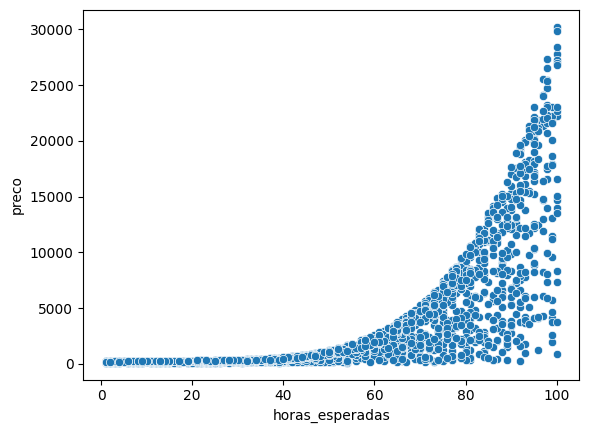

In [5]:
import seaborn as sns
#utilizaremos o scatterplot para nos retornar um grafico onde o eixo x serão as horas esperadas e o eixo y o preço pago
#explorando BI
sns.scatterplot(x = 'horas_esperadas', y = "preco", data = dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

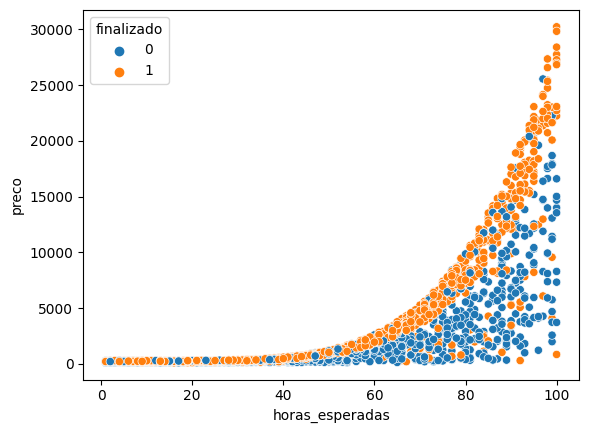

In [6]:
# acrescentando o parâmetro "hue" "=" e logo após a coluna de diferenciação, garantimos que o seaborn plotará os dados em cores diferentes, de acordo com a coluna informada em hue
sns.scatterplot(x = 'horas_esperadas', y = "preco", hue='finalizado', data = dados)

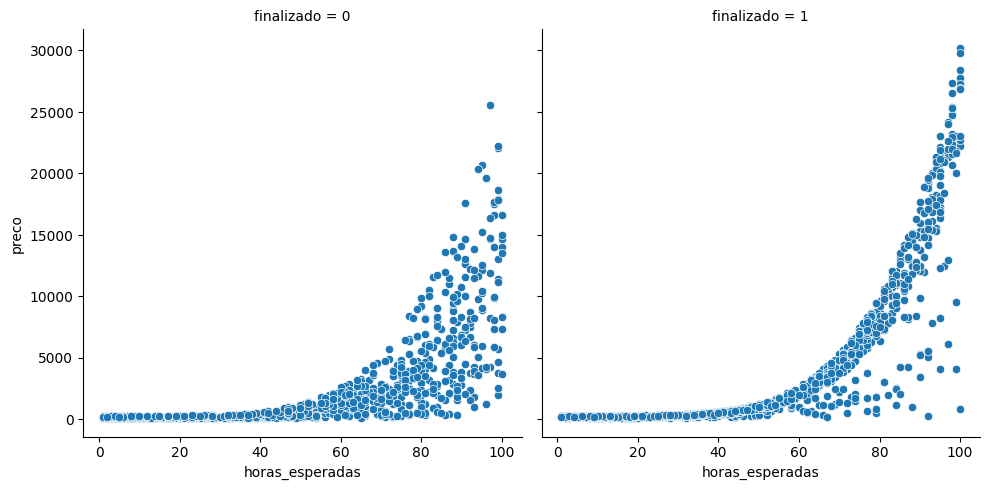

In [7]:
# no caso de relplot, utilizamos o parâmetro "col" seguido de "=" para diferenciar os dados em 
#"colunas" que são graficos separados para cada resultado possivel em relação a coluna mencionada
sns.relplot(x = 'horas_esperadas', y = "preco", col='finalizado', data = dados)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y, test_size = 0.10)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
#parâmetros a serem passados (teste_y, previsoes)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("Taxa de acerto %.2f%%" %(taxa_de_acerto))

Treinaremos com 1941 elementos e testaremos com 216 elementos
Taxa de acerto 49.54%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
#voltar no video da aula anterior

<Axes: xlabel='horas_esperadas', ylabel='preco'>

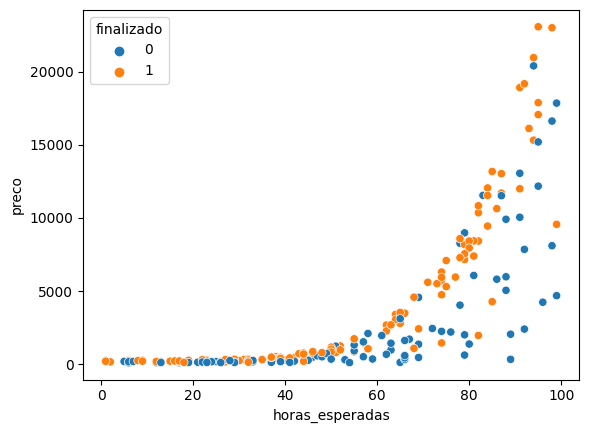

In [10]:
#Hue tambem sporta dados
sns.scatterplot(x = 'horas_esperadas', y = "preco", hue=teste_y, data = teste_x)

In [11]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)


1 99 105 23062


In [12]:
import numpy as np
pixels = 100
#cria um array com range e conteudo de todos os divisíveis no percurso de 100 pixel do eixo_x
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
#cria um array com range e conteudo de todos os divisíveis no percurso de 100 pixel do eixo_x  
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
#aqui crio um grafico com 10o vezes o x e 100 vezes o y apenas  
xx, yy = np.meshgrid(eixo_x, eixo_y)
#aqui faremos a junção
pontos = np.c_[xx.ravel(), yy.ravel()]

In [13]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

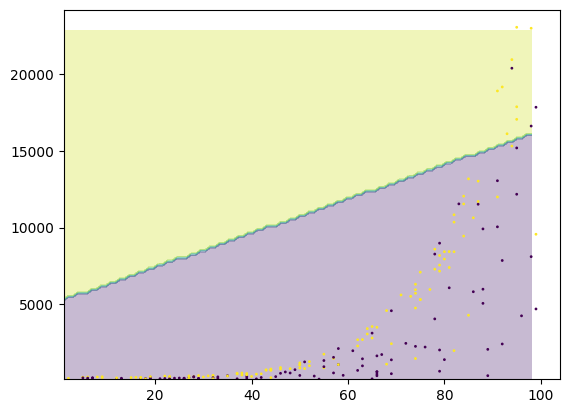

In [14]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
# DECISION BOUNDARY